<a href="https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/process/CO2_compression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Calculation of CO2 compression systems
#@markdown Litterature and calculations of CO2 recompression systems.
#@markdown <br><br>This document is part of the module ["Introduction to Gas Processing using NeqSim in Colab"](https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/examples_of_NeqSim_in_Colab.ipynb#scrollTo=_eRtkQnHpL70).
%%capture
! apt update -q
! apt-get install -q openjdk-25-jdk-headless -q
!pip install neqsim
import neqsim
from neqsim.thermo.thermoTools import *
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math
plt.style.use('classic')
%matplotlib inline

#Litterature
https://www.powermag.com/capturing-co2-gas-compression-vs-liquefaction/

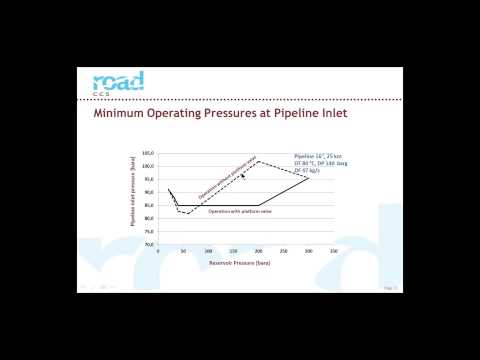

In [2]:
#@title From compressor to reservoir -- Flow assurance and control philosophy for CCS CO2 operation
#@markdown This video gives an intriduction to CO2 reinjection
from IPython.display import YouTubeVideo
YouTubeVideo('FPZxXX0fx40', width=600, height=400)

#The following example demonstrate calculation of a recompression and pumping system for CO2

In [3]:
from neqsim.thermo import fluid, phaseenvelope,printFrame
from neqsim.process import clearProcess, stream, valve, pump, separator, compressor, runProcess, viewProcess, heater, mixer, recycle, cooler

# Start by creating a fluid in neqsim
fluid1 = fluid("srk")  # create a fluid using the SRK-EoS
fluid1.addComponent("methane", 2.0e-6)
fluid1.addComponent("ethane", 1.0e-6)
fluid1.addComponent("CO2", 2.0)
fluid1.setTemperature(35.15, "C")
fluid1.setPressure(1.5, "bara")
fluid1.setTotalFlowRate(0.5, "MSm3/day")


clearProcess()
stream1 = stream('feed CO2',fluid1)
compressor1 = compressor('1st stage compressor', stream1,pres=5.0)
cooler1 = cooler('1st stage after cooler', compressor1.getOutStream())
cooler1.setOutTemperature(20.0, 'C')
compressor2 = compressor('2ns stage compressor', cooler1.getOutStream(),pres=10.0)
cooler2 = cooler('2nd stage after cooler', compressor2.getOutStream())
cooler2.setOutTemperature(20.0, 'C')
compressor3 = compressor('3rd stage compressor', cooler2.getOutStream(),pres=25.0)
cooler3 = cooler('3rd stage after cooler', compressor3.getOutStream())
cooler3.setOutTemperature(20.0, 'C')
compressor4 = compressor('4th stage compressor', cooler3.getOutStream(),pres=65.0)
cooler4 = cooler('4th stage after cooler', compressor4.getOutStream())
cooler4.setOutTemperature(30.0, 'C')
pump1 = pump('CO2 injection pump', cooler4.getOutStream(),p=200.0)
cooler5 = cooler('CO2 injection cooler', pump1.getOutStream())
cooler5.setOutTemperature(30.0, 'C')
runProcess()

print('1st stage compressor power ', compressor1.getPower()/1.0e6, ' MW')
print('2nd stage compressor power ', compressor2.getPower()/1.0e6, ' MW')
print('3rd stage compressor power ', compressor3.getPower()/1.0e6, ' MW')
print('4th stage compressor power ', compressor4.getPower()/1.0e6, ' MW')
print('CO2 injection pump ', pump1.getPower()/1.0e6, ' MW')

print('cooler 1 duty ', cooler1.getDuty()/1.0e6, ' MW')
print('cooler 2 duty ', cooler2.getDuty()/1.0e6, ' MW')
print('cooler 3 duty ', cooler3.getDuty()/1.0e6, ' MW')
print('cooler 4 duty ', cooler4.getDuty()/1.0e6, ' MW')
print('cooler 5 duty ', cooler5.getDuty()/1.0e6, ' MW')


1st stage compressor power  0.8560308244153201  MW
2nd stage compressor power  0.4349527831866509  MW
3rd stage compressor power  0.573067740697828  MW
4th stage compressor power  0.5466121911983655  MW
CO2 injection pump  0.5030971338156696  MW
cooler 1 duty  -1.0314754527748018  MW
cooler 2 duty  -0.4885565833813281  MW
cooler 3 duty  -0.7527682891394045  MW
cooler 4 duty  -1.1537484463587073  MW
cooler 5 duty  -2.287833810707293  MW


#CO2 phase behaviour

In [4]:
print('compressor 1')
printFrame(compressor1.getInStream().getFluid())
printFrame(compressor1.getOutStream().getFluid())
print('compressor 2')
printFrame(compressor2.getInStream().getFluid())
printFrame(compressor2.getOutStream().getFluid())
print('compressor 3')
printFrame(compressor3.getInStream().getFluid())
printFrame(compressor3.getOutStream().getFluid())
print('compressor 4')
printFrame(compressor4.getInStream().getFluid())
printFrame(compressor4.getOutStream().getFluid())
print('pump')
printFrame(pump1.getInStream().getFluid())
printFrame(pump1.getOutStream().getFluid())
print('injected CO2')
printFrame(pump1.getOutStream().getFluid())
printFrame(cooler5.getOutStream().getFluid())

compressor 1
| 0                    | 1          | 2                 | 3   | 4   | 5   | 6               |
|:---------------------|:-----------|:------------------|:----|:----|:----|:----------------|
|                      | total      | GAS               |     |     |     |                 |
| methane              | 9.99999E-7 | 9.99999E-7        |     |     |     | [mole fraction] |
| ethane               | 4.99999E-7 | 4.99999E-7        |     |     |     | [mole fraction] |
| CO2                  | 9.99999E-1 | 9.99999E-1        |     |     |     | [mole fraction] |
|                      |            |                   |     |     |     |                 |
| Density              |            | 2.59309E0         |     |     |     | kg/m3           |
| Phase Fraction       |            | 1E0               |     |     |     | [mole fraction] |
| Molar Mass           | 4.401E-2   | 4.401E-2          |     |     |     | kg/mol          |
| Z factor             |            | 9.93153E-

# Comparing energy of compression and cooling of CO2
In the following calculation we compare the power need for compression to a case with cooling of CO2.



In [5]:
from neqsim.thermo import fluid,printFrame
from neqsim.process import clearProcess, stream, compressor, runProcess, cooler

start_temperature = 15
start_pressure = 8.0
end_pressure = 15.0

fluidCO2 = fluid('srk')
fluidCO2.addComponent("CO2", 1.0, 'kg/sec')
fluidCO2.setPressure(start_pressure, "bara")
fluidCO2.setTemperature(start_temperature, "C")

clearProcess()
stream1 = stream('feed CO2', fluidCO2)
compressor1 = compressor('CO2 compressor', stream1, pres=end_pressure)
runProcess()

print('Compressor: kW/kg ' + str(compressor1.getPower('kW')/stream1.getFlowRate('kg/sec')))

start_pressure = 1.0
start_temperature = -28
end_temperature = -49

fluidCO2 = fluid('srk')
fluidCO2.addComponent("CO2", 1.0, 'kg/sec')
fluidCO2.setPressure(start_pressure, "bara")
fluidCO2.setTemperature(start_temperature, "C")

clearProcess()
stream1 = stream('feed CO2', fluidCO2)
cooler1 = cooler('CO2 cooler', stream1)
cooler1.setOutTemperature(end_temperature, 'C')

runProcess()

print('Cooling: kW/kg ' + str(cooler1.getDuty()/1e3/stream1.getFlowRate('kg/sec')))

Compressor: kW/kg 35.057086652462985
Cooling: kW/kg -16.44043510461503
